In [14]:
###########################################################################################################################
#
# Antonio Vieira da Silva Neto - NUSP  5690149 - Doutorando em Ciências
# Henrique Lefundes da Silva   - NUSP 11808280 - Pesquisador de Iniciação Científica e Graduando em Engenharia Elétrica
#
# Escola Politécnica da Universidade de São Paulo
# Programa de Pós-Graduação em Engenharia Elétrica
# Departamento de Engenharia de Computação e Sistemas Digitais
# Área de Concentração: Confiabilidade e Segurança
#
# Tese de Doutorado: Safety ArtISt: Um Método para a Garantia de Segurança Crítica de Sistemas com Inteligência Artificial
#
# Estudo de Caso 4 - Sistema de Controle de Frenagem de Veículos
#
# Arquivo para geração do modelo base de IA
#
###########################################################################################################################

###########################################################################################################################
#
# Tabela de Controle de Versões do Código
#
#--------|-------------------|------------------------------|--------------------------------------------------------------
# Versão | Data (dd/mm/aaaa) | Autor                        | Descrição da Versão
#--------|-------------------|------------------------------|--------------------------------------------------------------
#   01   |    28/07/2022     | Henrique Lefundes da Silva   | Versão inicial.
#--------|-------------------|------------------------------|--------------------------------------------------------------
###########################################################################################################################

# Importação de Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report 

In [15]:
# Pré-processamento dos dados (pre_processing)

def pre_processing(address):
    dataColumns = ["Distância Ruidosa", "Velocidade Ruidosa", "Capacidade de Frenagem Ruidosa",
                    "Decisão"]
    
    dataset = pd.read_csv(address, header = None, names = dataColumns)

    return dataset

In [16]:
# Realiza a leitura do arquivo CSV
# O arquivo se encontra numa pasta dentro do diretório deste programa:
# ./Árvore de Decisão/Dataset/Dataset.csv
pp_dataset = pre_processing("./Dataset/Dataset.csv")
print(pp_dataset)

       Distância Ruidosa  Velocidade Ruidosa  Capacidade de Frenagem Ruidosa  \
0               0.000000            0.000000                          1.3950   
1               0.000000            0.000000                          1.1625   
2               1.579846            0.000000                          0.9300   
3               0.282185            0.000000                          0.7800   
4               0.394876            0.000000                          0.6500   
...                  ...                 ...                             ...   
57280        2000.433820           26.977928                          1.3950   
57281        1999.988138           28.886308                          1.1625   
57282        1998.246886           28.409583                          0.9300   
57283        2002.044078           27.358991                          0.7800   
57284        1998.055064           27.991858                          0.6500   

       Decisão  
0          1.0  
1    

In [17]:
#Define as entradas e as saídas do dataset

pp_data_inputs = pp_dataset.drop(columns = ['Decisão'])
print(pp_data_inputs)

pp_data_outputs = pp_dataset[['Decisão']]
print(pp_data_outputs)


       Distância Ruidosa  Velocidade Ruidosa  Capacidade de Frenagem Ruidosa
0               0.000000            0.000000                          1.3950
1               0.000000            0.000000                          1.1625
2               1.579846            0.000000                          0.9300
3               0.282185            0.000000                          0.7800
4               0.394876            0.000000                          0.6500
...                  ...                 ...                             ...
57280        2000.433820           26.977928                          1.3950
57281        1999.988138           28.886308                          1.1625
57282        1998.246886           28.409583                          0.9300
57283        2002.044078           27.358991                          0.7800
57284        1998.055064           27.991858                          0.6500

[57285 rows x 3 columns]
       Decisão
0          1.0
1          1.0
2    

In [18]:
random_state = 1

# Definição dos hiperparâmetros


criterion = ['entropy', 'gini']

splitter = ['best', 'random']

max_depth = [int(x) for x in np.arange(1, 205, step = 5)]
max_depth.append(None)

min_samples_split = [int(x) for x in np.arange(2, 18, step = 3)]

min_samples_leaf = [int(x) for x in np.arange(1, 18, step = 3)]

max_features = ['log2', 'sqrt', None] #Pode ser inteiro ou float também, devemos variar com int e float?

hyperparameters_settings = {'criterion'         : criterion,
                            'splitter'          : splitter,
                            'max_depth'         : max_depth,
                            'min_samples_split' : min_samples_split,
                            'min_samples_leaf'  : min_samples_leaf,
                            'max_features'      : max_features
                           }

print(hyperparameters_settings)

# Metrica de performance
scoring = 'recall'

# Número de partições
k_fold = 10 


{'criterion': ['entropy', 'gini'], 'splitter': ['best', 'random'], 'max_depth': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81, 86, 91, 96, 101, 106, 111, 116, 121, 126, 131, 136, 141, 146, 151, 156, 161, 166, 171, 176, 181, 186, 191, 196, 201, None], 'min_samples_split': [2, 5, 8, 11, 14, 17], 'min_samples_leaf': [1, 4, 7, 10, 13, 16], 'max_features': ['log2', 'sqrt', None]}


In [19]:
# Criação da árvore de decisão
starting_decision_tree = DecisionTreeClassifier()

# Optimização dos hiperparâmetros
dtTries = RandomizedSearchCV(estimator = starting_decision_tree, param_distributions = hyperparameters_settings, scoring = scoring,
                            cv = KFold(n_splits = k_fold, shuffle = True), verbose = 4, n_jobs = -1)

# Teste com os hiperparâmetros encontrados
dtTries.fit(pp_data_inputs, pp_data_outputs)


Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [1, 6, 11, 16, 21, 26, 31,
                                                      36, 41, 46, 51, 56, 61,
                                                      66, 71, 76, 81, 86, 91,
                                                      96, 101, 106, 111, 116,
                                                      121, 126, 131, 136, 141,
                                                      146, ...],
                                        'max_features': ['log2', 'sqrt', None],
                                        'min_samples_leaf': [1, 4, 7, 10, 13,
                                                             16],
                                        'min_samples_split': [2, 5, 8, 11, 14,
                        

In [20]:
print(dtTries.best_params_)
print(k_fold,'- Fold Best recall-score: ', dtTries.best_score_*100)

{'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 41, 'criterion': 'entropy'}
10 - Fold Best recall-score:  96.16398176607503


In [21]:
# Segunda iteração

criterion = ['entropy']

splitter = ['best']

max_depth = [int(x) for x in np.arange(14, 19, step = 1)]

min_samples_split = [int(x) for x in np.arange(15, 20, step = 1)]

min_samples_leaf = [int(x) for x in np.arange(8, 13, step = 1)]

max_features = [None] #Pode ser inteiro ou float também, devemos variar com int e float?

hyperparameters_settings = {'criterion'         : criterion,
                            'splitter'          : splitter,
                            'max_depth'         : max_depth,
                            'min_samples_split' : min_samples_split,
                            'min_samples_leaf'  : min_samples_leaf,
                            'max_features'      : max_features
                           }

print(hyperparameters_settings)

scoring = 'recall'

k_fold = 10 

{'criterion': ['entropy'], 'splitter': ['best'], 'max_depth': [14, 15, 16, 17, 18], 'min_samples_split': [15, 16, 17, 18, 19], 'min_samples_leaf': [8, 9, 10, 11, 12], 'max_features': [None]}


In [22]:
print(dtTries.best_params_)
print(k_fold, '-Fold Best recall-score: ', dtTries.best_score_*100)

{'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 7, 'max_features': None, 'max_depth': 41, 'criterion': 'entropy'}
10 -Fold Best recall-score:  96.16398176607503


In [23]:
# Árvore de decisão final
final_decision_tree = DecisionTreeClassifier(splitter = 'best', min_samples_split = 17, 
                                            min_samples_leaf = 10, max_features = None, 
                                            max_depth = 16, criterion = 'entropy')

# Holdout test
inputsTrain, inputsTest, outputsTrain, outputsTest = train_test_split(pp_data_inputs, 
                                                                      pp_data_outputs,
                                                                      test_size = 0.2)

final_decision_tree.fit(inputsTrain, outputsTrain)

# Valores preditos pela árvore treinada
predicted_apply_brakes = final_decision_tree.predict(inputsTest)

# Métricas de performance
finalAccuracy = accuracy_score(outputsTest, predicted_apply_brakes)
finalPrecision = precision_score(outputsTest, predicted_apply_brakes)
finalRecall = recall_score(outputsTest, predicted_apply_brakes)
finalF1 = f1_score(outputsTest, predicted_apply_brakes)
finalConfusionMatrix = confusion_matrix(outputsTest, predicted_apply_brakes)
finalClassificationReport = classification_report(outputsTest, predicted_apply_brakes)

# Plot da árvore de decisão treinada, comentado apenas para menor tempo de execução
# plot_tree(final_decision_tree)
# plt.show()



Accuracy: 99.15335602688313
Precision: 96.06087735004476
Recall: 95.29307282415631
F1-Score: 95.67543468568881
[[10287    44]
 [   53  1073]]


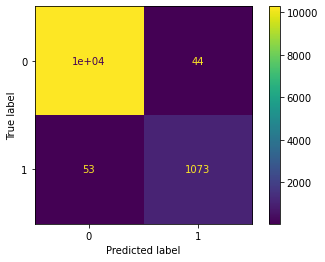

In [24]:
# Imprime resultados finais
print('Accuracy:', finalAccuracy*100)
print('Precision:', finalPrecision*100)
print('Recall:', finalRecall*100)
print('F1-Score:', finalF1*100)
print(finalConfusionMatrix)
ConfusionMatrixDisplay(finalConfusionMatrix).plot()
plt.show()

